In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
import xavierUtils as xu
import datetime as dt
%autosave 1000000

Autosaving every 1000000 seconds


In [2]:
pd.to_datetime('2019-02-01') + pd.to_timedelta(99, unit='d')

Timestamp('2019-05-11 00:00:00')

In [3]:
today = dt.datetime.now().strftime("%Y-%m-%d")
print today

2019-05-02


### Carregando dados

In [4]:
# Dados brutos sobre órgãos (comissões, etc.):
query = "SELECT * FROM `gabinete-compartilhado.camara_v2.deputados_orgaos`"

rorgaos = pd.read_gbq(query, project_id='gabinete-compartilhado', 
                dialect='standard',
                private_key='../keys-configs/gabinete-compartilhado.json')

rorgaos['id_deputado'] = rorgaos.api_url.map(lambda s: int(s.split('/')[-2]))

In [5]:
# Ocupação de tipos de cargos (nossa classificação) e score de poder:
query = "SELECT * FROM `gabinete-compartilhado.analise_congresso_poder.camara_cargos_score`"

rcargos = pd.read_gbq(query, project_id='gabinete-compartilhado', 
                dialect='standard',
                private_key='../keys-configs/gabinete-compartilhado.json')

In [6]:
# Ocupação de lideranças partidárias e de bloco:
query = "SELECT * FROM `gabinete-compartilhado.analise_congresso_poder.camara_liderancas_socre_`"

rlider = pd.read_gbq(query, project_id='gabinete-compartilhado', 
                dialect='standard',
                private_key='../keys-configs/gabinete-compartilhado.json')

In [7]:
# Informações sobre os deputados:
query = "SELECT * FROM `gabinete-compartilhado.camara_v2.deputados_detalhes`"
rdep  = pd.read_gbq(query, project_id='gabinete-compartilhado', 
                    dialect='standard',
                    private_key='../keys-configs/gabinete-compartilhado.json')

In [8]:
# Informações sobre os deputados:
query = "SELECT * FROM `gabinete-compartilhado.camara_v2.deputados`"
rdep0 = pd.read_gbq(query, project_id='gabinete-compartilhado', 
                    dialect='standard',
                    private_key='../keys-configs/gabinete-compartilhado.json')

### Exploração

#### Base Cargos

In [254]:
print xu.Bold('-- Cargos --')
xu.unique(rcargos.columns)

-- Cargos --
5:cargo | data_fim | data_inicio | id_deputado | score


In [255]:
rcargos.dtypes

data_inicio    datetime64[ns]
data_fim       datetime64[ns]
id_deputado             int64
cargo                  object
score                 float64
dtype: object

In [67]:
xu.checkMissing(rcargos)

Colunas com valores faltantes:
Empty DataFrame
Columns: [coluna, N, %]
Index: []


In [69]:
xu.mapUnique(rcargos)


data_inicio: 562 unique values.
(sample) 2001-03-20T00:00:00.000000000,  2001-03-28T00:00:00.000000000,  2001-04-03T00:00:00.000000000,  2001-11-19T00:00:00.000000000,  2005-11-29T00:00:00.000000000,  2009-12-08T00:00:00.000000000,  2011-06-09T00:00:00.000000000,  2013-03-20T00:00:00.000000000,  2014-04-10T00:00:00.000000000,  2014-04-22T00:00:00.000000000,  2015-03-10T00:00:00.000000000,  2015-03-23T00:00:00.000000000,  2015-09-22T00:00:00.000000000,  2015-11-24T00:00:00.000000000,  2016-02-16T00:00:00.000000000,  2016-05-02T00:00:00.000000000,  2016-05-03T00:00:00.000000000,  2016-06-20T00:00:00.000000000,  2017-11-09T00:00:00.000000000,  2019-04-15T00:00:00.000000000

data_fim: 584 unique values.
(sample) 1999-09-14T00:00:00.000000000,  2001-04-20T00:00:00.000000000,  2001-05-24T00:00:00.000000000,  2005-03-31T00:00:00.000000000,  2005-06-02T00:00:00.000000000,  2005-11-22T00:00:00.000000000,  2007-10-05T00:00:00.000000000,  2011-08-24T00:00:00.000000000,  2012-11-22T00:00:00.00000

#### Base Lideranças

In [256]:
print xu.Bold('-- Lideranças --')
xu.unique(rlider.columns)

-- Lideranças --
7:cargo | id_cargo | id_deputado | score | sigla_bloco | timestamp | total_membros


In [66]:
rlider.dtypes

timestamp        datetime64[ns]
id_deputado             float64
id_cargo                  int64
sigla_bloco              object
total_membros           float64
cargo                    object
score                   float64
dtype: object

In [68]:
xu.checkMissing(rlider)

Colunas com valores faltantes:
          coluna   N      %
1    id_deputado  15   2.67
4  total_membros  81  14.44


In [257]:
xu.mapUnique(rlider)


timestamp: 3 unique values.
2019-04-16T00:00:00.000000000,  2019-04-17T00:00:00.000000000,  2019-04-18T00:00:00.000000000

id_deputado: 181 unique values.
(sample) 73891.0,  74161.0,  74262.0,  74471.0,  151208.0,  160665.0,  164359.0,  178832.0,  178854.0,  178930.0,  178959.0,  204423.0,  204441.0,  204447.0,  204449.0,  204472.0,  204520.0,  204546.0,  204556.0,  204558.0

id_cargo: 3 unique values.
2,  3,  4

sigla_bloco: 33 unique values.
(sample) Bloco PDT, AVANTE,  Bloco PP, MDB, PTB,  CIDADANIA,  DEM,  Governo,  MDB,  Maioria,  NOVO,  Oposição,  PATRI,  PDT,  PMN,  PODE,  PP,  PR,  PRB,  PROS,  PSC,  PSD,  PT

total_membros: 22 unique values.
(sample) 3.0,  6.0,  12.0,  21.0,  24.0,  30.0,  33.0,  42.0,  81.0,  84.0,  90.0,  93.0,  96.0,  105.0,  108.0,  114.0,  162.0,  165.0,  252.0,  nan

cargo: 3 unique values.
Lider Governo Camara,  Lider de Partido/Bloco,  Vice Lider

score: 3 unique values.
2.3,  3.6,  3.7


#### Base orgaos (bruta)

In [14]:
xu.unique(rorgaos.columns)

11: api_url | capture_date | codTitulo | dataFim | dataInicio | idOrgao | id_deputado | nomeOrgao | siglaOrgao | titulo | uriOrgao


In [15]:
rdep.loc[rdep.id==204534]

,api_url,capture_date,cpf,dataNascimento,escolaridade,id,municipioNascimento,nomeCivil,redeSocial,sexo,ufNascimento,ultimoStatus,uri,urlWebsite
5390,https://dadosabertos.camara.leg.br/api/v2/depu...,2019-05-02 01:02:39,3.884832e+10,1993-11-14,Superior,204534,São Paulo,TABATA CLAUDIA AMARAL DE PONTES,[],F,SP,"{u'nomeEleitoral': u'TABATA AMARAL', u'situaca...",https://dadosabertos.camara.leg.br/api/v2/depu...,None


#### Base deputados

In [312]:
xu.unique(rdep.columns)

14: api_url | capture_date | cpf | dataNascimento | escolaridade | id | municipioNascimento | nomeCivil | redeSocial | sexo | ufNascimento | ultimoStatus | uri | urlWebsite


In [313]:
xu.checkMissing(rdep)

Colunas com valores faltantes:
                 coluna    N      %
4          escolaridade   23    3.9
6   municipioNascimento    2   0.34
10         ufNascimento    3   0.51
13           urlWebsite  586  99.32


In [321]:
# ATENÇÃO: Data de falecimento faltando é uma string vazia:
#rdep.sort_values('dataNascimento').dataFalecimento[1009]

### Pesos dos cargos e lideranças

In [19]:
pd.concat([rcargos[['cargo','score']].drop_duplicates(),rlider[['cargo','score']].drop_duplicates()])\
.sort_values('score', ascending=False).set_index('cargo', drop=True)

,score
cargo,
Lider Governo Camara,3.7
Lider de Partido/Bloco,3.6
"Presidencia Comissao Serie A - CCJC, CMO e CFT",3.5
Membro da Mesa,2.8
Presidente CPI,2.8
"Presidencia Comissao Serie B - CE, CETASP, CINDA, CREDEN, CSSF, CCTCI, CVT, CMADS, CSPCCO, CME, CAPADR, CDC, CDEIC",2.6
Relator de Comissao Especial,2.5
Vice Lider,2.3
"Membro de Comissao Serie A - CCJC, CMO e CFT",1.9


In [71]:
rlider[['cargo','score']].drop_duplicates().sort_values('score',ascending=False)

,cargo,score
366,Lider Governo Camara,3.7
0,Lider de Partido/Bloco,3.6
3,Vice Lider,2.3


### Evolução temporal do número de cargos por deputado

In [18]:
# Função para selecionar cargos ativos num certo período:
def activeInPeriod(df, start, end):
    if np.any(df.columns.values=='data_inicio') and np.any(df.columns.values=='data_fim'):
        return df.loc[(df.data_fim>=start) & (df.data_inicio<=end)]
    if np.any(df.columns.values=='dataInicio') and np.any(df.columns.values=='dataFim'):
        return df.loc[(df.dataFim>=start) & (df.dataInicio<=end)]
    if np.any(df.columns.values=='timestamp'):
        return df.loc[(df.timestamp>=start) & (df.timestamp<=end)]

In [21]:
orgaosActive = activeInPeriod(rorgaos,'2019-02-01','2019-04-23').sort_values('id_deputado')
cargosActive = activeInPeriod(rcargos,'2019-02-01','2019-04-23').sort_values('id_deputado')

In [22]:
# Teste para verificar quais cargos e deputados aparecem nas bases:

#idList = orgaosActive.loc[orgaosActive.titulo!='Suplente'].id_deputado.unique()
#t=6
#cargosActive.loc[cargosActive.id_deputado==idList[t]][['id_deputado','cargo','score','data_inicio','data_fim']]
#orgaosActive.loc[(orgaosActive.titulo!='Suplente')&(orgaosActive.id_deputado==idList[t])]\
#[['id_deputado','siglaOrgao','titulo','dataInicio','dataFim']]

In [23]:
# Vimos que a CESPO - Comissão do Esporte - não é contabilizada na base cargos.
#rorgaos.loc[rorgaos.siglaOrgao=='CESPO']

In [24]:
def nCargosPreenchidos(ano):
    return len(activeInPeriod(rcargos, str(ano)+'-02-01', str(ano)+'-04-16')[['id_deputado','cargo']])

In [36]:
anos         = np.arange(1999,2020)
nCargosByAno = np.array([nCargosPreenchidos(a) for a in anos])

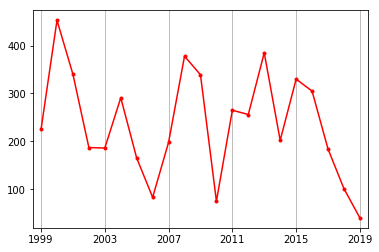

In [41]:
pl.plot(anos, nCargosByAno,'r-')
pl.plot(anos, nCargosByAno,'r.')
pl.xlim([1998.5,2019.5])
pl.xticks(np.arange(1999,2020,4))
pl.grid(axis='x')
pl.show()

In [68]:
y = nCargosByAno
x = anos
yIdx  = pd.date_range(start=str(x[0])+'-'+str(1).zfill(2)+'-01', periods=len(x),freq='A-JAN')
yFull = pd.Series(y, index=yIdx)

In [70]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(yFull.iloc[:-1], model='additive', freq=4)

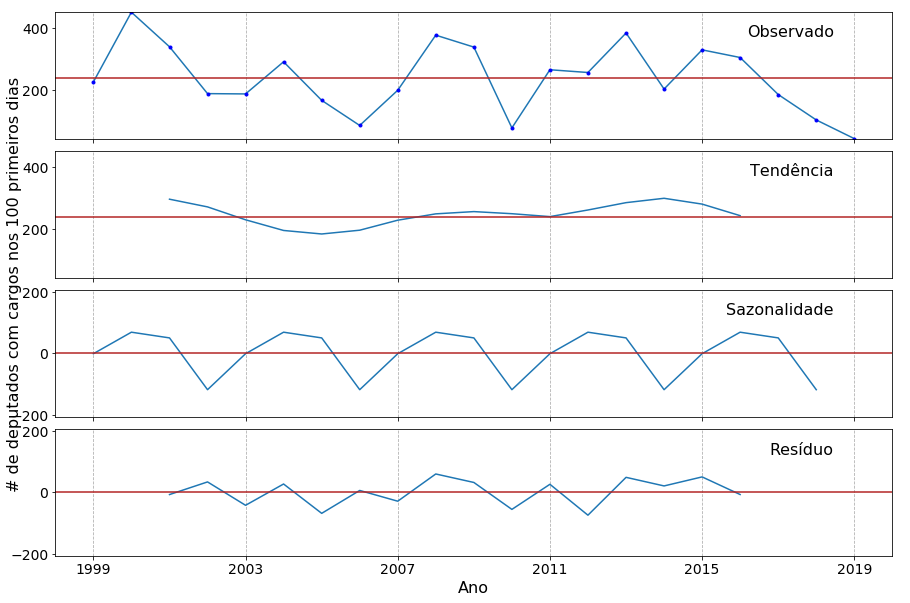

In [92]:
#xPeriod = np.arange(1999,2020,4) # Para grid no plot.
xPeriod = yIdx[::4]

fullTS = pd.Series(y,x, name='fullTimeSeries')
scale  = 1
ymin   = y[y>0].min()/scale
ymax   = y[y>0].max()/scale
deltay = ymax-ymin
sMean  = np.mean(y)/scale

fig = pl.figure(figsize=(15,10))

# Observed:
ax1 = pl.subplot(4,1,1)
pl.text(0.93,0.9,'Observado', horizontalalignment='right', verticalalignment='top', transform=pl.gca().transAxes, 
       fontsize=16)
pl.plot(yFull/scale)
pl.plot(yFull/scale, 'b.')

pl.ylim([ymin,ymax])
pl.gca().tick_params(labelsize=14)
pl.axhline(sMean,color='firebrick')
# Format x-axis:
pl.xticks(xPeriod)
pl.grid(axis='x', linestyle='--')
pl.gca().tick_params(labelbottom=False)
# Novas legislaturas:
#[pl.axvline(a, color='k') for a in anoLegislatura]

# Trend:
pl.subplot(4,1,2, sharex=ax1)
pl.text(0.93,0.9,u'Tendência', horizontalalignment='right', verticalalignment='top', transform=pl.gca().transAxes, 
       fontsize=16)
pl.plot(result.trend/scale)
pl.ylim([ymin,ymax])
pl.gca().tick_params(labelsize=14)
pl.axhline(sMean,color='firebrick')
# Format x-axis:
pl.xticks(xPeriod)
pl.grid(axis='x', linestyle='--')
pl.gca().tick_params(labelbottom=False)
# Novas legislaturas:
#[pl.axvline(a, color='k') for a in anoLegislatura]

# Seasonal:
pl.subplot(4,1,3, sharex=ax1)
pl.text(0.93,0.9,'Sazonalidade', horizontalalignment='right', verticalalignment='top', transform=pl.gca().transAxes, 
       fontsize=16)

pl.plot(result.seasonal/scale)
pl.ylim([-deltay/2, deltay/2])
pl.gca().tick_params(labelsize=14)
# Format x-axis:
pl.xticks(xPeriod)
pl.grid(axis='x', linestyle='--')
pl.gca().tick_params(labelbottom=False)
pl.axhline(0,color='firebrick')
# Novas legislaturas:
#[pl.axvline(a, color='k') for a in anoLegislatura]

# Residual:
pl.subplot(4,1,4, sharex=ax1)
pl.text(0.93,0.9,u'Resíduo', horizontalalignment='right', verticalalignment='top', transform=pl.gca().transAxes, 
       fontsize=16)
pl.plot(result.resid/scale)
pl.ylim([-deltay/2, deltay/2])
pl.gca().tick_params(labelsize=14)
# Format x-axis:
pl.xticks(xPeriod)
pl.grid(axis='x', linestyle='--')
pl.axhline(0,color='firebrick')
pl.xlabel('Ano', fontsize=16)
# Novas legislaturas:
#[pl.axvline(a, color='k') for a in anoLegislatura]


# Label x comum:
axComum = fig.add_subplot(111, frameon=False)
pl.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
axComum.set_ylabel(u'# de deputados com cargos nos 100 primeiros dias', fontsize=16)

# Ajustes finais:
pl.gca().tick_params(labelsize=14)
pl.subplots_adjust(hspace=0.1)

pl.show()

In [16]:
def nOrgaosPreenchidos(ano):
    return len(activeInPeriod(rorgaos.loc[rorgaos.titulo!='Suplente'], 
                              str(ano)+'-02-01', str(ano)+'-04-18')[['id_deputado','siglaOrgao']])

In [21]:
xu.unique(rorgaos.columns)

11: api_url | capture_date | codTitulo | dataFim | dataInicio | idOrgao | id_deputado | nomeOrgao | siglaOrgao | titulo | uriOrgao


In [22]:
xu.unique(rorgaos.nomeOrgao)

914: Acompanhar a apuração do acidente ocorrido na madrugada de hoje na Plataforma  P-36, da Petrobrás, no Campo de Roncador, na Bacia de Campos | Altera o Sistema Tributário Nacional e dá outras providências. | Bancada do Rio de Janeiro | Centro de Estudos e Debates Estratégicos | Comissão  Parlamentar de Inquérito destinada a " investigar as relaçoes do Banco Central do Brasil com o sistema financeiro privado" - PROER. | Comissão Especial  destinada a analisar proposições legislativas que tenham por objetivo o combate à pirataria. | Comissão Especial  destinada a proferir parecer à Proposta de Emenda à Constituição nº 299-A, de 2013, do Sr. Eduardo Cunha e outros, que "altera o art. 88 da Constituição Federal" (limita o número de ministérios) | Comissão Especial  destinada a proferir parecer à Proposta de Emenda à Constituição nº 405-A, de 2009,  do Sr. Cleber Verde, que "altera a redação do § 8º do art. 195 da Constituição Federal, para assegurar ao Garimpeiro e ao pequeno minerador

In [19]:
anos         = np.arange(1990,2020)
nOrgaosByAno = np.array([nOrgaosPreenchidos(a) for a in anos])

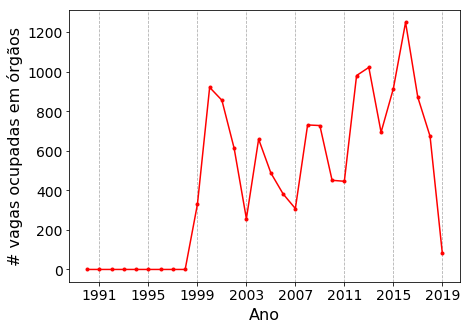

In [26]:
pl.figure(figsize=(7,5))
pl.plot(anos, nOrgaosByAno,'r-')
pl.plot(anos, nOrgaosByAno,'r.')
pl.xticks(np.arange(2019,1990,-4))
pl.grid(axis='x', linestyle='--')
pl.gca().tick_params(labelsize=14)
pl.xlabel('Ano', fontsize=16)
pl.ylabel(u'# vagas ocupadas em órgãos', fontsize=16)
#xu.saveFigWdate('graficos/orgaos-ocupados-por-ano.pdf')
pl.show()

In [ ]:
# CONCLUSÃO: O ano de 2019 está com problemas na base de dados. Vamos realizar a análise ignorando esse ano.

### Distribuição de poder por deputados

#### Cargos em comissões

In [329]:
rdep0.loc[(rdep0.id<=165429.5)&(rdep0.id>=165428.5)]

,api_url,capture_date,cpf,dataNascimento,escolaridade,id,municipioNascimento,nomeCivil,redeSocial,sexo,ufNascimento,ultimoStatus,uri,urlWebsite


In [327]:
rdep.merge(rcargos,how='outer',left_on='id',right_on='id_deputado')

,api_url,capture_date,cpf,dataNascimento,escolaridade,id,municipioNascimento,nomeCivil,redeSocial,sexo,ufNascimento,ultimoStatus,uri,urlWebsite,data_inicio,data_fim,id_deputado,cargo,score
0,https://dadosabertos.camara.leg.br/api/v2/depu...,2019-04-29 01:10:55,6.767706e+10,1965-09-06,Pós-Graduação,107283.0,Curitiba,GLEISI HELENA HOFFMANN,"[facebook.com/gleisi.hoffmann, www.flickr.com/...",F,PR,"{u'nomeEleitoral': u'GLEISI HOFFMANN', u'situa...",https://dadosabertos.camara.leg.br/api/v2/depu...,None,2019-04-09,2019-04-10,107283.0,"Membro de Comissao Serie A - CCJC, CMO e CFT",1.9
1,https://dadosabertos.camara.leg.br/api/v2/depu...,2019-04-29 01:10:55,6.767706e+10,1965-09-06,Pós-Graduação,107283.0,Curitiba,GLEISI HELENA HOFFMANN,"[facebook.com/gleisi.hoffmann, www.flickr.com/...",F,PR,"{u'nomeEleitoral': u'GLEISI HOFFMANN', u'situa...",https://dadosabertos.camara.leg.br/api/v2/depu...,None,2019-03-13,2019-04-09,107283.0,"Membro de Comissao Serie A - CCJC, CMO e CFT",1.9
2,https://dadosabertos.camara.leg.br/api/v2/depu...,2019-04-29 01:10:51,6.195638e+10,1973-11-11,Superior,112437.0,São Luís,JOÃO MARCELO SANTOS SOUZA,[],M,MA,"{u'nomeEleitoral': u'JOÃO MARCELO SOUZA', u'si...",https://dadosabertos.camara.leg.br/api/v2/depu...,None,2015-03-03,2016-02-02,112437.0,"Membro de Comissao Serie B - CE, CETASP, CINDA...",1.0
3,https://dadosabertos.camara.leg.br/api/v2/depu...,2019-04-29 01:10:52,4.066543e+10,1966-04-22,Superior,109429.0,Santana do Matos,LUIZ BENES LEOCADIO DE ARAUJO,[],M,RN,"{u'nomeEleitoral': u'BENES LEOCÁDIO', u'situac...",https://dadosabertos.camara.leg.br/api/v2/depu...,None,NaT,NaT,NaN,NaN,NaN
4,https://dadosabertos.camara.leg.br/api/v2/depu...,2019-04-29 01:10:53,3.512403e+10,1974-12-03,Pós-Graduação,108338.0,São Miguel do Oeste,DIRLAINE JAQUELINE CASSOL,[],F,SC,"{u'nomeEleitoral': u'JAQUELINE CASSOL', u'situ...",https://dadosabertos.camara.leg.br/api/v2/depu...,None,NaT,NaT,NaN,NaN,NaN
5,https://dadosabertos.camara.leg.br/api/v2/depu...,2019-04-29 01:10:49,4.482862e+10,1961-11-08,Superior,116379.0,Cafelândia,DARCI DE MATOS,[],M,PR,"{u'nomeEleitoral': u'DARCI DE MATOS', u'situac...",https://dadosabertos.camara.leg.br/api/v2/depu...,None,NaT,NaT,NaN,NaN,NaN
6,https://dadosabertos.camara.leg.br/api/v2/depu...,2019-04-29 01:10:50,8.461031e+10,1965-01-10,Ensino Médio Incompleto,115746.0,Campos dos Goytacazes,GELSON DE AZEVEDO ALMEIDA,[],M,RJ,"{u'nomeEleitoral': u'GELSON AZEVEDO', u'situac...",https://dadosabertos.camara.leg.br/api/v2/depu...,None,2019-04-23,2019-04-24,115746.0,"Membro de Comissao Serie A - CCJC, CMO e CFT",1.9
7,https://dadosabertos.camara.leg.br/api/v2/depu...,2019-04-29 01:10:50,8.461031e+10,1965-01-10,Ensino Médio Incompleto,115746.0,Campos dos Goytacazes,GELSON DE AZEVEDO ALMEIDA,[],M,RJ,"{u'nomeEleitoral': u'GELSON AZEVEDO', u'situac...",https://dadosabertos.camara.leg.br/api/v2/depu...,None,2019-03-13,2019-04-23,115746.0,"Membro de Comissao Serie B - CE, CETASP, CINDA...",1.0
8,https://dadosabertos.camara.leg.br/api/v2/depu...,2019-04-29 01:10:46,2.629057e+08,1972-06-29,Mestrado,122158.0,Rio de Janeiro,PEDRO PAULO CARVALHO TEIXEIRA,[],M,RJ,"{u'nomeEleitoral': u'PEDRO PAULO', u'situacao'...",https://dadosabertos.camara.leg.br/api/v2/depu...,None,2016-06-28,2016-11-23,122158.0,Membro de Comissao Serie C - Resto,0.3
9,https://dadosabertos.camara.leg.br/api/v2/depu...,2019-04-29 01:10:46,2.629057e+08,1972-06-29,Mestrado,122158.0,Rio de Janeiro,PEDRO PAULO CARVALHO TEIXEIRA,[],M,RJ,"{u'nomeEleitoral': u'PEDRO PAULO', u'situacao'...",https://dadosabertos.camara.leg.br/api/v2/depu...,None,2013-03-05,2013-03-14,122158.0,Membro de Comissao Serie C - Resto,0.3


In [319]:
activeInPeriod(rcargos,'2018-02-01','2018-04-25').groupby('id_deputado')['score'].size()

id_deputado
55        1
66179     3
67312     2
69871     1
72442     1
73714     2
73720     1
81366     3
88950     1
113247    1
122158    1
131943    3
131966    1
160976    2
171620    2
178839    4
178841    1
178846    2
178849    1
178855    2
178861    2
178872    1
178891    1
178894    1
178895    1
178902    2
178907    1
178911    1
178914    2
178915    1
         ..
178942    3
178943    1
178945    1
178967    1
178971    2
178979    1
178982    2
178983    1
178989    1
178990    1
178991    3
178992    1
178996    2
179000    1
179001    3
180545    2
191945    2
193066    1
193982    5
194260    1
194261    1
195143    1
195278    1
195826    3
195866    2
195997    2
196357    2
196378    1
199809    1
200153    1
Name: score, Length: 65, dtype: int64

In [305]:
rdep.loc[rdep.id_deputado==178849]

AttributeError: 'DataFrame' object has no attribute 'id_deputado'

In [304]:
rcargos.loc[rcargos.id_deputado==178849]

,data_inicio,data_fim,id_deputado,cargo,score
65,2015-07-08,2019-01-31,178849,Relator de Comissao Especial,2.5
403,2015-03-03,2016-02-02,178849,Membro de Comissao Serie C - Resto,0.3
824,2015-03-17,2016-03-29,178849,"Membro de Comissao Serie A - CCJC, CMO e CFT",1.9
2159,2016-05-03,2016-08-08,178849,"Membro de Comissao Serie B - CE, CETASP, CINDA...",1.0


In [280]:
activeInPeriod(rcargos,'2018-01-01','2019-01-01')

,data_inicio,data_fim,id_deputado,cargo,score
21,2015-02-01,2019-01-31,55,Membro da Mesa,2.8
65,2015-07-08,2019-01-31,178849,Relator de Comissao Especial,2.5
66,2015-11-24,2018-04-24,178945,Relator de Comissao Especial,2.5
69,2015-06-25,2019-01-31,69871,Relator de Comissao Especial,2.5
75,2015-03-18,2019-01-31,178929,Relator de Comissao Especial,2.5
98,2015-03-31,2018-12-05,178872,Relator de Comissao Especial,2.5
99,2015-04-15,2019-01-31,178894,Relator de Comissao Especial,2.5
102,2015-09-23,2019-01-31,178989,Relator de Comissao Especial,2.5
112,2018-04-24,2019-01-31,178914,Membro de Comissao Serie C - Resto,0.3
113,2018-05-08,2019-01-31,81366,Membro de Comissao Serie C - Resto,0.3


#### Lideranças de partidos/blocos (só vale para 2019)

In [276]:
def scoreFinalLider(df, score0, gain):
    
    bancadas = df.loc[df.total_membros.isnull()==False]
    # Verifica se bancada mudou de tamanho:
    Ncte = np.all(bancadas.groupby('sigla_bloco')['total_membros'].nunique()==1)
    if Ncte==False:
        raise Exception('Tamanho da bancada variou no período.')
    # Calcula tamanho do bloco de referência:
    ref = np.mean(bancadas[['sigla_bloco','total_membros']].drop_duplicates()).values[0]
    # Calcula o score levando em conta o tamanho da bancada:
    liderPartido = (df.id_cargo==3 * ~df.sigla_bloco.isin(['Minoria','Maioria','Governo',u'Oposição'])).astype(int)
    scoreFinal   = liderPartido*(score0 + gain * df.total_membros/ref * df.score).fillna(0) + (1-liderPartido)*df.score
    # Retorna o resultado:
    scoreFinal.name = 'scoreFinal'
    return scoreFinal

In [277]:
rlider['scoreFinal'] = scoreFinalLider(rlider,0.3,1)